## Семинар 6 - Продолжение проверки гипотез

Вспоминая предыдущий семинар, рассмотрим следующий пример:

**Леди, дегустирующая чай**

Известный статистик Рональд Фишер провел [эксперимент](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%B4%D0%B8,_%D0%B4%D0%B5%D0%B3%D1%83%D1%81%D1%82%D0%B8%D1%80%D1%83%D1%8E%D1%89%D0%B0%D1%8F_%D1%87%D0%B0%D0%B9), в котором предложил даме 8 чашек чая, в 4 из которых сначала добавили чай, а потом молоко, а в 4 другие – наоборот (сначала молоко, потом чай). 
Ей необходимо было разбить чашки на две группы (первым было 
молоко или первым был чай). 
Проверялась гипотеза о том, что дама случайно угадывает, что было налито первым. 
В ходе анализа этого эксперимента Фишер придумал так называемый [Точный тест Фишера](https://ru.wikipedia.org/wiki/Точный_тест_Фишера), а дама подтвердила свое умение определять, что было первым налито в чашку.


<center>
<img src="lady.png" width="400" height="400">
</center>

Проведем следующий эксперимент:

Будем предлагать даме по 2 чашки с разным чаем, чтобы она выбрала в которой из них сначала налито молоко.
Повторим эксперимент 10 раз.

Выбор дамы будем фиксировать: 0 - сначала молоко, 1 - сначала чай. Данная величина будет иметь распределение Бернулли.

Предположим, что дама выбирает наугад, тогда мы равновероятно можем получить любой из $2^n$ бинарных векторов длины $n$ (в нашам случае 10)&

Нулевая гипотеза выбора наугад соответствует значению $p=\frac{1}{2}$, то есть, в каждом эксперименте вероятность выбора чая, в который сначала налито молоко – $\frac{1}{2}$. 
Сумма 10 одинаково распределённых бернуллиевских случайных величин с параметром $p$ имеет биномиальное распределение $Bin(10, p)$. Тогда нулевое распределение статистики $T$ — $Bin\left(10, \frac1{2}\right)$.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy

In [2]:
# Биномиальное распределение
n = 10
F_H0 = stats.binom(n, 0.5)

Есть несколько вариантов выбора альтернативной гипотезы:

Односторонняя означает, что мы проверяем гипотезу: дама угадывает лучше, чем наугад (чаще действительно угадывает молоко).

In [5]:
stats.binom_test(9, 10, 0.5, alternative = 'greater')

0.010742187499999998

Двусторонняя означает, что мы проверяем гипотезу: дама угадывает не наугад (или чаще действительно угадывает молоко или чаще вместо молока указывает на чай)


In [6]:
stats.binom_test(9, 10, 0.5, alternative = 'two-sided')

0.021484374999999997

Заметим, что и в первом случае для стат.значимости надо угадать 9 раз из 10, а во втором - или угадать 9 раз или ошибиться 9 раз.

**Авокадо**

Теперь рассмотрим пример, где эксперимент можно произвести очень много раз.

Предположим, мы проверяем умеет ли сотрудник магазина овощей и фруктов визуально определять свежий авокадо или нет.

Кстати, вопрос: авокадо - фрукт или овощ? А может ягода?

<center>
<img src="avocado_picture.jpeg" width="300" height="100">
</center>

Проведем эксперимент 1000 раз. 

Предположим, что ответ консультанта как результат подбрасывания правильной монеты, то есть вероятность того или иного ответа равна 0.5

 **Z-критерий для доли**

**Выборка**    $X_n = {X_1 ... X_n}$ из распределения Бернулли $X \sim Ber(p)$

**Нулевая гипотеза**    $H_0: p = p_0$

**Альтернативная гипотеза**     $H_1: \hat p = p_0$  (Двусторонняя альтернатива)

**Статистика** $$ Z_n = \dfrac{\hat p-p_0}{\sqrt{\dfrac{p_0(1-p_0)}{n}}}$$

**Нулевое распределение** $Z_n \sim N(0,1)$

In [10]:
# консультант 550 ответил правильно и 450 нет
result = np.concatenate((np.ones(550), np.zeros(450)))

In [5]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
np.concatenate((np.ones(5), np.zeros(5)))

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [11]:
np.concatenate((np.ones(5), np.zeros(5))).mean()

0.5

In [12]:
result.mean()

0.55

In [13]:
p_0 = 0.5

mean = result.mean()

z_stat = (mean - p_0)/np.sqrt(p_0 * (1 - p_0)/len(result))

z_stat

3.162277660168382

Доверительный интервал для $p_0$ :

$$ \hat p - Z_{0.5 \alpha} \sqrt{\dfrac{ \hat p(1- \hat p)}{n}} < p_{0} < \hat p + Z_{0.5 \alpha} \sqrt{\dfrac{ \hat p(1- \hat p)}{n}} $$

In [19]:
mean - 1.96 * np.sqrt(mean * (1 - mean)/len(result)),
mean + 1.96 * np.sqrt(mean * (1 - mean)/len(result))

(0.5191650198637976, 0.5808349801362025)

In [14]:
1, 2, 3

(1, 2, 3)

Таким образом, в данном примере продавец решает поставленную задачу с большой вероятностью лучше бросания монетки.

### Резюмируя, какой же тест использовать?

#### Единственная выборка

$X_n = {X_1 ... X_n}$ - независимы и одинаково распределены (не обязательно нормально) и наблюдений много: 

$$H_0: \mu = \mu_0$$, $$H_a: \mu \neq \mu_0$$ 

$$ Z = \dfrac{\bar{X}-\mu_0}{\sqrt{\dfrac{\hat \sigma^2}{n}}}$$

$$ \text{При верной } H_0 : Z \rightarrow N(0,1) $$


$X_n = {X_1 ... X_n}$ - независимы и одинаково **нормально** распределены и наблюдений не обязательно много: 

$$H_0: \mu = \mu_0$$, $$H_a: \mu \neq \mu_0$$ 

$$ t = \dfrac{\bar{X}-\mu_0}{\sqrt{\dfrac{\hat \sigma^2}{n}}}$$

$$ \text{При верной } H_0 : t \sim t_{n-1} $$

$X_n = {X_1 ... X_n}$ - независимы и одинаково **нормально** распределены и наблюдений не обязательно много и **известна** $\sigma^2$

$$H_0: \mu = \mu_0$$, $$H_a: \mu \neq \mu_0$$ 

$$ Z = \dfrac{\bar{X}-\mu_0}{\sqrt{\dfrac{\sigma^2}{n}}}$$

$$ \text{При верной } H_0 : Z \sim N(0,1) $$

$X_n = {X_1 ... X_n}$ - независимы и имеют **распределение Бернулли** и наблюдений много: 

$$H_0: p = p_0$$, $$H_a: p \neq p_0$$ 

$$ Z = \dfrac{\hat p-p_0}{\sqrt{\dfrac{p_0(1-p_0)}{n}}}$$

$$ \text{При верной } H_0 : Z \rightarrow N(0,1) $$


### Пара выборок

Гипотеза о разнице ожиданий при большом количестве наюлюдений

$X_n = {X_1 ... X_n}$ - одинаково распределены, не обязательно нормально

$Y_k= {Y_1 ... Y_k}$ - одинаково распределены, не обязательно нормально, возможно, не так как $X$

Возможно, $n \neq k$, но оба значения достаточно велики

$$H_0: \mu_x - \mu_y = \delta $$, $$H_a: \mu_x - \mu_y \neq \delta$$

$$ Z = \frac{\bar X - \bar Y - \delta}{\sqrt{\frac{\hat\sigma^2_{x}}{n_x} + \frac{\hat\sigma^2_{y}}{n_y}}} $$

$$ \text{При верной } H_0 : Z \rightarrow N(0,1) $$

$$ \text{Если дисперсии известны, то } H_0 : Z \sim N(0,1) $$

С парой выборок мы еще не сталкивались, поэтому рассмотрим **пример**, но перед этим вспомним про p-value

**Определение** 

*p-value* или достигаемый уровень значимости это вероятность получить такое же или еще более экстремальное значение статистики, чем было получено в эксперименте, при условии справедливости $H_0$

То есть если p-value достаточно мало, это значит, что данные свидетельствуют против нулевой гипотезы, потому что вероятность получить такое значение при ее справедливости мала. Обычно p-value сравнивают с заранее заданным уровнем значимости $\alpha$, обычно 0.05 или 0.01. Ну и если $p-value < \alpha$, говорят, что нулевая гипотеза отвергается в пользу альтернативы.

### Online VS Offline

Лектор записывал свои лекции для студентов, которые не присутствовали на паре, чтобы они могли посмотреть материал позже в удобное время.
Однако он предположил, что студенты, присутствовашие на паре очно лучше усвоили материал.
В конце курса лектор записал экзаменационные баллы тех и других студентов и решил статистически проверить свою гипотезу.

In [15]:
online = [95, 89, 68, 80, 77, 87, 93, 71, 74, 85]
offline = [77, 91, 85, 67, 50, 61, 54, 81, 73, 86]

Проверим гипотезу на 5% уровне значимости 

$$H_0: \mu_{off} \leq \mu_{on} $$, $$H_a: \mu_{off} > \mu_{on} $$


Z-критерий и t-критерий проверяют простую гипотезу о равенстве средних двух нормальных распределений против любой альтернативы. 
Z-критерий не будем рассматривать, так как для него необходимо знать дисперсию (которая в реальности не является известной).
t-критерий частично реализован с помощью функции ttest_ind:

* **stats.ttest_ind(sample1, sample2, equal_var)** — t-критерий для случая независимых выборок. 

sample1 и sample2 — реализации первой и второй выборки

equal_var булевая переменная, которая связана с предположением равенства дисперсии

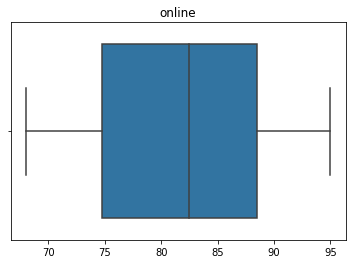

In [22]:
# Постройте ящики с усами для 2 данных выборок, чтобы визуально оценить отличия
import seaborn as sns
# sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=online)
ax.set_title('online');

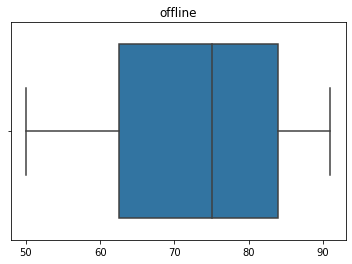

In [23]:
ax2 = sns.boxplot(x=offline)
ax2.set_title('offline');

In [24]:
ttest, pval = stats.ttest_ind(online, offline, 0)
print(ttest, pval)

1.7599581460531524 0.09539812817336057


Так как гипотеза односторонняя, делим p-value на 2

In [33]:
pval/2

0.04769906408668029

Так как p-value < 0.05 отвергаем нулевую гипотезу.

До этого мы использовали независимые выборки.

Парный t-критерий Стьюдента используется для сравнения двух зависимых (парных) выборок. 
Зависимыми являются измерения, например, выполненные у одних и тех же пациентов, но в разное время, при каких-то определенных условиях

Будем использовать [данные](https://github.com/Opensourcefordatascience/Data-sets/blob/master/blood_pressure.csv) артериального давления пациентов до и после операции. 
Это переменные bp_before и bp_after

$$H_0: \delta = 0 $$, $$H_a: \delta \neq 0 $$

In [25]:
df = pd.read_csv("blood_pressure.csv")

df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


**Задание:** Постройте гистограммы по группам (выберите наиболее подходящий тип)

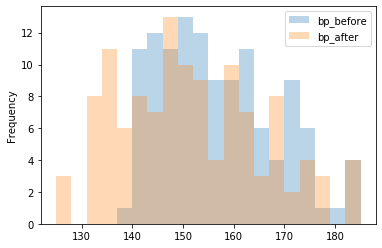

In [34]:
df[['bp_before','bp_after']].plot(kind='hist', alpha=0.3, bins=20);

In [35]:
stats.ttest_rel(df['bp_before'], df['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

**Задание:** проинтерпретируйте гипотезы и результат теста.
Значим ли эффект изменения давления после операции для одних и тех же пациентов?

На этом же датасете сравните среднее давление среди мужчин и женщин в соответствующих возрастных группах (их 3)

Какой тест вы будете использовать: для независимых выборок или парных?

Поэкспериментируйте с гистограммами

In [42]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [38]:
df.groupby('sex')[['bp_before','bp_after']].mean()

,bp_before,bp_after
sex,,
Female,153.633333,147.200000
Male,159.266667,155.516667
